In [ ]:
# PCA Code

In [ ]:
import numpy as np
np.random.seed(2343243)

In [2]:
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 20)

In [3]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec2, cov_mat2, 20)

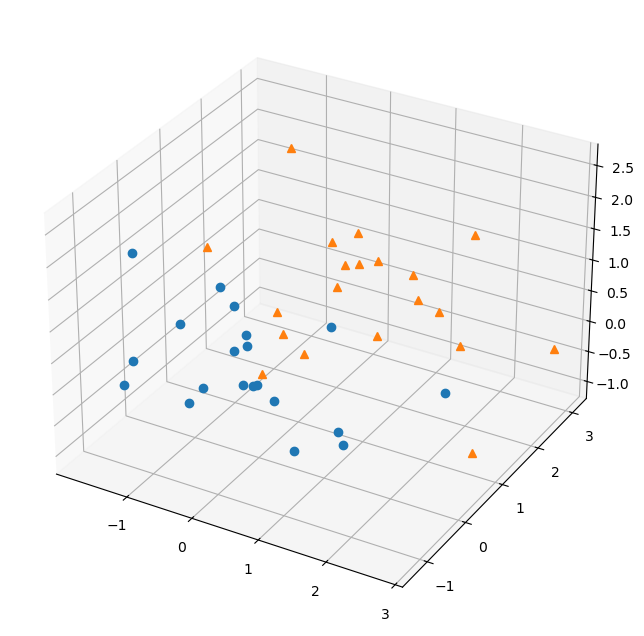

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], '^')
plt.show()

In [5]:
all_data = np.concatenate((class1, class2))
all_data.shape

(40, 3)

In [6]:
all_data.mean(axis = 0)

array([0.4560612 , 0.47118588, 0.64109922])

In [7]:
all_data = all_data.T

In [8]:
cov_mat = np.cov(all_data)    # Calculation of co-variance matrix
cov_mat    

array([[1.48156581, 0.43272336, 0.00832651],
       [0.43272336, 1.06868385, 0.09154185],
       [0.00832651, 0.09154185, 0.77659054]])

In [9]:
eig_val, eig_vec = np.linalg.eig(cov_mat)      # Calculation of eigen values and eigen vectors 
eig_val, eig_vec, eig_vec[:,0]                 # i-th column from eig_vec contains eigen vector for i-th element in eig_val 

(array([1.75777104, 0.8582392 , 0.71082995]),
 array([[-0.84204244, -0.43906668,  0.31334482],
        [-0.5363712 ,  0.61995098, -0.57268378],
        [-0.05718794,  0.65029319,  0.75752776]]),
 array([-0.84204244, -0.5363712 , -0.05718794]))

In [10]:
eig_val_vec_pairs = []
for i in range(len(eig_val)):
    eig_vector = eig_vec[:,i]
    eig_val_vec_pairs.append((eig_val[i], eig_vector))   
eig_val_vec_pairs.sort(reverse = True)                   ## selecting top-2 most important eigen values with most explained variance                       
matrix_eig = np.array([eig_val_vec_pairs[0][1],eig_val_vec_pairs[1][1]]) 
matrix_eig

array([[-0.84204244, -0.5363712 , -0.05718794],
       [-0.43906668,  0.61995098,  0.65029319]])

In [11]:
eig_val_vec_pairs

[(1.7577710419235262, array([-0.84204244, -0.5363712 , -0.05718794])),
 (0.8582391965561241, array([-0.43906668,  0.61995098,  0.65029319])),
 (0.7108299538825635, array([ 0.31334482, -0.57268378,  0.75752776]))]

In [12]:
transformed = matrix_eig.dot(all_data)    #Transforming data into 2D 
transformed = transformed.T
transformed.shape

(40, 2)

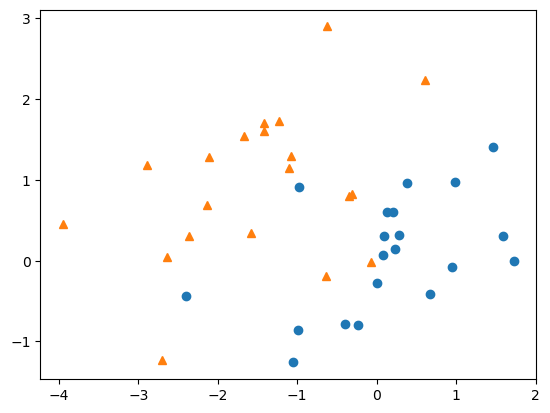

In [13]:
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], '^')

plt.show()

In [14]:
# PCA lb-BUILT

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components =2)
skl_transformed = pca.fit_transform(all_data.T)

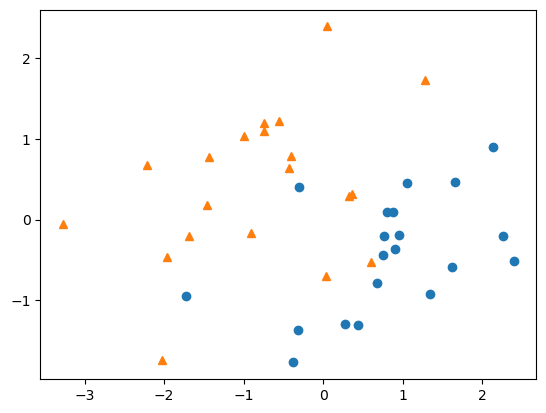

In [17]:
skl_transformed[:, 0] *= -1
plt.plot(skl_transformed[0:20, 0], skl_transformed[0:20, 1], 'o')
plt.plot(skl_transformed[20:40, 0], skl_transformed[20:40, 1], '^')

plt.show()

In [18]:
# How to select value of K 
# Value of k is directly proportional to variance explained by data, thus selecting an optimal value of k is very imporatant. 
# Primary objective should be to select k small enough to explain maximum variance is the transformed data. 
#Then transforming the data into k dimensions.

C:\Users\hp\AppData\Local\Temp\ipykernel_30624\254818107.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 200)


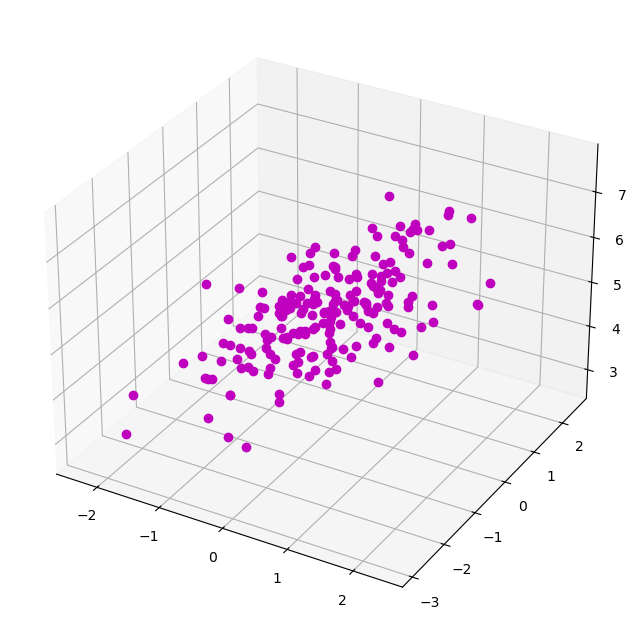

In [19]:
import numpy as np
import pandas as pd

#creating a plane (now maximum variance would be explained by only 2 axis)

mean_vec1 = np.array([0,0,5])
cov_mat1 = np.array([[1,0,1],[0,1,0],[0.5,0,0.9]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 200)



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')        #111 is 1 row and 1 column of plot and last 1 is for position
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o',color="m")
plt.show()

In [20]:
df=pd.DataFrame(class1)
df.to_csv('3d_points.csv', index=False)
# https://plot.ly/create/#/ 
#upload the saved file there to see the 3D plot more clearly 

In [21]:
pca = PCA()
pca.fit(class1)

PCA()

In [22]:
k = 0
total = 0
while total <.9:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio 
    k = k + 1
k

2

In [23]:
pca = PCA(n_components=2)
#pca.fit(class1)

skl_transformed = pca.fit_transform(class1) 
pca.components_
pca.explained_variance_ratio_ #explained variance ratios wrt each component 

array([0.58563216, 0.34104541])

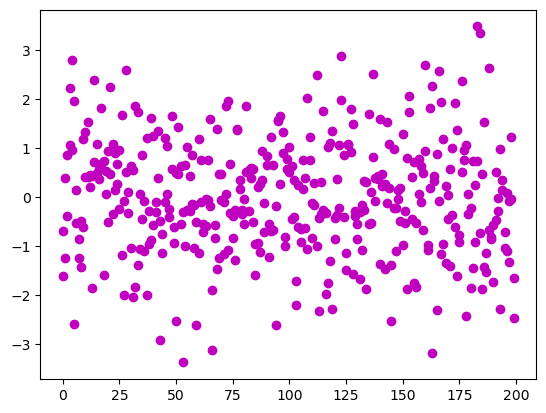

In [24]:
plt.plot(skl_transformed, 'o',color="m")
plt.show()